In [1]:
import numpy as np

## MLP Implemenation
exception handling skipped

In [2]:
class NeuralNetwork():
    def __init__(self, sizes):
        self.layers = len(sizes) # number of layers, including input and output layers
        self.sizes = sizes       # number of neurons in each layers. Its a vector
        self.weights = [np.random.rand(self.sizes[i-1], self.sizes[i]) for i in range(1, self.layers)]
        self.bias =  [np.random.rand(s, 1) for s in self.sizes[1:]]

    # forward propagation function
    def forward(self, x):
        for w, b in list(zip(self.weights, self.bias)):
            x = self.sigmoid(w.T @ x + b)
        return x

    # backward propagation function
    def backprop(self, x, y):
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        nabla_b =  [np.zeros(b.shape) for b in self.bias]
        deltas = [np.zeros(w.shape) for w in self.weights]

        # forward propagation
        activation = x
        activations = [x]
        zs = []

        for w, b in list(zip(self.weights, self.bias)):
            z = w.T @ activation + b
            zs.append(z)
            activation = self.sigmoid(z)
            activations.append(activation)

        # backprop
        deltas[-1] = 2 * (activations[-1] - y)

        for i in range(self.layers-2, -1, -1):
            diag_zs_prime = np.diag(self.sigmoid_prime(zs[i]).flatten())
            delta = diag_zs_prime.T @ deltas[i]
            nabla_w[i] = activations[i] @ delta.T
            nabla_b[i] = delta

            v = self.weights[i] @ diag_zs_prime
            deltas[i-1] = v @ deltas[i]

        # for nw, nb in list(zip(nabla_w, nabla_b)):
        #     print(nw.shape, nb.shape, end=" ")
        # print()
            
        return (nabla_w, nabla_b)


    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_prime(self, x):
        return np.exp(x) / ((1 + np.exp(x)) ** 2)

## Gradient Descent Implementation

In [3]:
def SGD(model, x, y, step_length, n_epochs=1000):
    
    for i in range(n_epochs):

        e = 0
        nabla_w = [np.zeros(w.shape) for w in model.weights]
        nabla_b = [np.zeros(b.shape) for b in model.bias]
        
        for xi, yi in list(zip(x, y)):
            xi = np.array(xi).reshape(-1, 1)
            yi = np.array(yi).reshape(-1, 1)
            
            # forward propagation
            y_hat = model.forward(xi)
            e = np.sum((y_hat - yi) ** 2)

            # backward propagation
            delta_nabla_w, delta_nabla_b = model.backprop(xi, yi)
            nabla_w = [nw + dnw for nw, dnw in list(zip(nabla_w, delta_nabla_w))]
            nabla_b = [nb + dnb for nb, dnb in list(zip(nabla_b, delta_nabla_b))]
            
        model.weights = [mw - step_length * nw for mw, nw in list(zip(model.weights, nabla_w))]
        model.bias = [mb - step_length * nb for mb, nb in list(zip(model.bias, nabla_b))]

    
        if i %100 == 0:
            print(f"Epoch {i}: Error : {e}")

## Verification

In [4]:
from sklearn.datasets import make_multilabel_classification

data = make_multilabel_classification(n_samples=1000, n_classes=4, n_features=4, random_state=42)
X, y = data
X = np.asarray(X)
y = np.asarray(y)
print(X.shape, type(X))
print(y.shape, type(y))

(1000, 4) <class 'numpy.ndarray'>
(1000, 4) <class 'numpy.ndarray'>


In [5]:
sizes = [X.shape[1], 8, 4]
model = NeuralNetwork(sizes)
print(model)

In [6]:
n_epochs = 1000
step_length = 0.01
SGD(model, X, y, step_length, n_epochs)

Epoch 0: Error : 0.0009383297409809988
Epoch 100: Error : 2.999052152368393
Epoch 200: Error : 1.9998791945480483
Epoch 300: Error : 2.9923970417264263
Epoch 400: Error : 2.996583513659261
Epoch 500: Error : 2.9606000889749047
Epoch 600: Error : 2.2166296808464216
Epoch 700: Error : 2.0326860106227462
Epoch 800: Error : 2.993684048746437
Epoch 900: Error : 1.9975152147811244


In [7]:
X_test = X[:100]
y_test = y[:100]


for i in range(100):
    xt = X_test[i].reshape(-1, 1)
    y_hat = model.forward(xt)
    print(y_hat, y_test[i])

[[2.56668243e-05]
 [9.99726962e-01]
 [7.31222506e-04]
 [6.55017236e-05]] [0 1 0 0]
[[2.56665089e-05]
 [9.99726964e-01]
 [7.31219736e-04]
 [6.55013645e-05]] [0 0 0 0]
[[2.56665197e-05]
 [9.99726964e-01]
 [7.31220017e-04]
 [6.55013870e-05]] [0 0 1 0]
[[2.56665149e-05]
 [9.99726964e-01]
 [7.31219765e-04]
 [6.55013710e-05]] [1 1 1 1]
[[2.56666920e-05]
 [9.99726962e-01]
 [7.31223112e-04]
 [6.55016005e-05]] [1 1 1 1]
[[2.56665927e-05]
 [9.99726963e-01]
 [7.31220853e-04]
 [6.55014932e-05]] [0 1 0 1]
[[2.56666597e-05]
 [9.99726963e-01]
 [7.31221429e-04]
 [6.55015485e-05]] [0 1 1 1]
[[2.56665217e-05]
 [9.99726964e-01]
 [7.31219998e-04]
 [6.55013815e-05]] [0 0 0 0]
[[2.56665531e-05]
 [9.99726963e-01]
 [7.31220165e-04]
 [6.55014178e-05]] [0 1 1 0]
[[2.56665211e-05]
 [9.99726964e-01]
 [7.31219935e-04]
 [6.55013848e-05]] [0 0 1 0]
[[2.56665129e-05]
 [9.99726964e-01]
 [7.31219817e-04]
 [6.55013721e-05]] [0 0 1 1]
[[2.56667988e-05]
 [9.99726961e-01]
 [7.31226121e-04]
 [6.55017505e-05]] [1 0 0 0]
[[2.

In [8]:
# sizes = [5, 6, 7, 2]
# layers = len(sizes)

# weight = [np.random.rand(sizes[i-1], sizes[i]) for i in range(1, layers)]
# bias =  [np.random.rand(s) for s in sizes[1:]]

# print(weight)
# print(bias)
# model = NeuralNetwork(np.array([4, 8, 8, 3]))
# x = np.random.rand(4)
# print("Input:")
# print(x)
# output = model.forward(x)
# print("\nOutput:")
# print(output)

# y = np.array([[1, 2, 3, 5]])
# print(y.shape)
# y = y.reshape(1, 4)
# print(y)

# y = np.array([1, 2, 3, 4])
# print(y.shape)
# # y = y.reshape(1, -1)
# # print(y.shape)

# a = np.zeros((4, 1))
# print(a.shape)
# # print(a.shape == y.shape)

# sub = y - a
# print(sub)

# a = np.array([1, 2, 3, 4])
# diag = np.eye(len(a))
# a = diag * a
# print(a)

# Using Pytorch for MLP

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [10]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [11]:
# Define the MLP model with 2 hidden layers
class MLP(nn.Module):
    def __init__(self, input_size=784, hidden1_size=512, hidden2_size=256, output_size=10):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, output_size)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        # Flatten the input
        x = x.view(x.size(0), -1)
        
        # First hidden layer
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        
        # Second hidden layer
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        
        # Output layer
        x = self.fc3(x)
        return x

In [12]:
# Data preprocessing and loading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # MNIST mean and std
])

# Load MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

100%|██████████| 9.91M/9.91M [00:00<00:00, 57.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.47MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 15.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.51MB/s]


In [13]:
# Create data loaders
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model
model = MLP().to(device)
print(f'Model architecture:\n{model}')

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

Model architecture:
MLP(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [14]:
# Training function
def train(model, device, train_loader, optimizer, criterion, epoch):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        output = model(data)
        loss = criterion(output, target)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item()
        _, predicted = torch.max(output.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()
        
        if batch_idx % 100 == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} '
                  f'({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}')
    
    avg_loss = running_loss / len(train_loader)
    accuracy = 100. * correct / total
    return avg_loss, accuracy

# Testing function
def test(model, device, test_loader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()
    
    test_loss /= len(test_loader)
    accuracy = 100. * correct / total
    
    print(f'Test set: Average loss: {test_loss:.4f}, '
          f'Accuracy: {correct}/{total} ({accuracy:.2f}%)')
    
    return test_loss, accuracy

In [15]:
# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

print("Starting training...")
for epoch in range(1, num_epochs + 1):
    # Train
    train_loss, train_acc = train(model, device, train_loader, optimizer, criterion, epoch)
    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    
    # Test
    test_loss, test_acc = test(model, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accuracies.append(test_acc)
    
    print(f'Epoch {epoch}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%, '
          f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%\n')

Starting training...
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.307523
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.255038
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.228494
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.211094
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.157705
Test set: Average loss: 0.1150, Accuracy: 9651/10000 (96.51%)
Epoch 1: Train Loss: 0.2573, Train Acc: 92.11%, Test Loss: 0.1150, Test Acc: 96.51%

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.156967
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.097618
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.073155
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.123575
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.040790
Test set: Average loss: 0.0815, Accuracy: 9718/10000 (97.18%)
Epoch 2: Train Loss: 0.1094, Train Acc: 96.59%, Test Loss: 0.0815, Test Acc: 97.18%

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.131632
Train Epoch: 3 [12800/60000 (21%)]	Loss: 0.030282
Train Epoch: 3 [25600/60000 (43%)]	Loss: 0.051102
Train Epoch: 3 [38400/60000 (64%)]	Loss: 0.071099


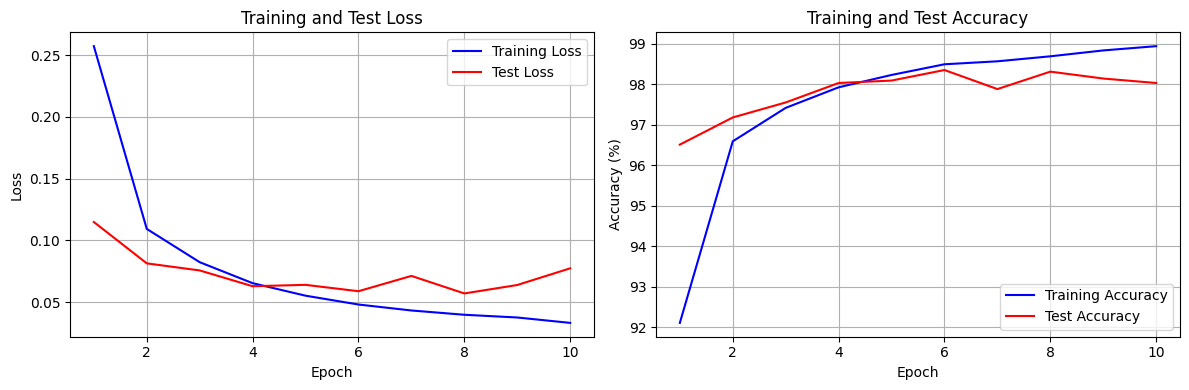

In [16]:
# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Loss plot
ax1.plot(range(1, num_epochs + 1), train_losses, 'b-', label='Training Loss')
ax1.plot(range(1, num_epochs + 1), test_losses, 'r-', label='Test Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Test Loss')
ax1.legend()
ax1.grid(True)

# Accuracy plot
ax2.plot(range(1, num_epochs + 1), train_accuracies, 'b-', label='Training Accuracy')
ax2.plot(range(1, num_epochs + 1), test_accuracies, 'r-', label='Test Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training and Test Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

In [17]:
# Save the trained model
torch.save(model.state_dict(), 'mnist_mlp_model.pth')
print("Model saved as 'mnist_mlp_model.pth'")

Model saved as 'mnist_mlp_model.pth'


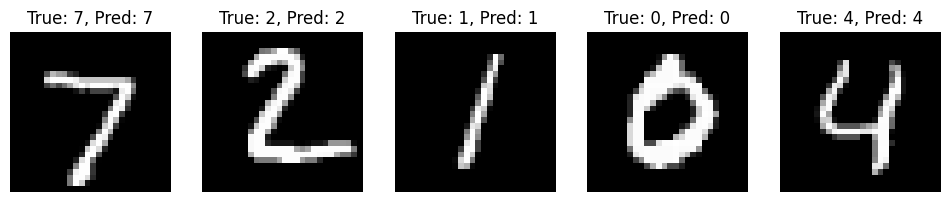


Final Test Accuracy: 98.03%


In [18]:
# Test on a few samples
def visualize_predictions(model, test_loader, device, num_samples=5):
    model.eval()
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    
    with torch.no_grad():
        images = images.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
    
    # Plot some test images with predictions
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 3))
    for i in range(num_samples):
        axes[i].imshow(images[i].cpu().squeeze(), cmap='gray')
        axes[i].set_title(f'True: {labels[i].item()}, Pred: {predicted[i].item()}')
        axes[i].axis('off')
    plt.show()

# Visualize some predictions
visualize_predictions(model, test_loader, device)

print(f"\nFinal Test Accuracy: {test_accuracies[-1]:.2f}%")